In [1]:
from ISLP import load_data

In [2]:
weekly = load_data('Weekly')

In [3]:
weekly

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up


In [4]:
weekly.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


In [5]:
import pandas as pd

array([[<Axes: xlabel='Year', ylabel='Year'>,
        <Axes: xlabel='Lag1', ylabel='Year'>,
        <Axes: xlabel='Lag2', ylabel='Year'>,
        <Axes: xlabel='Lag3', ylabel='Year'>,
        <Axes: xlabel='Lag4', ylabel='Year'>,
        <Axes: xlabel='Lag5', ylabel='Year'>,
        <Axes: xlabel='Volume', ylabel='Year'>,
        <Axes: xlabel='Today', ylabel='Year'>],
       [<Axes: xlabel='Year', ylabel='Lag1'>,
        <Axes: xlabel='Lag1', ylabel='Lag1'>,
        <Axes: xlabel='Lag2', ylabel='Lag1'>,
        <Axes: xlabel='Lag3', ylabel='Lag1'>,
        <Axes: xlabel='Lag4', ylabel='Lag1'>,
        <Axes: xlabel='Lag5', ylabel='Lag1'>,
        <Axes: xlabel='Volume', ylabel='Lag1'>,
        <Axes: xlabel='Today', ylabel='Lag1'>],
       [<Axes: xlabel='Year', ylabel='Lag2'>,
        <Axes: xlabel='Lag1', ylabel='Lag2'>,
        <Axes: xlabel='Lag2', ylabel='Lag2'>,
        <Axes: xlabel='Lag3', ylabel='Lag2'>,
        <Axes: xlabel='Lag4', ylabel='Lag2'>,
        <Axes: xlabel='Lag

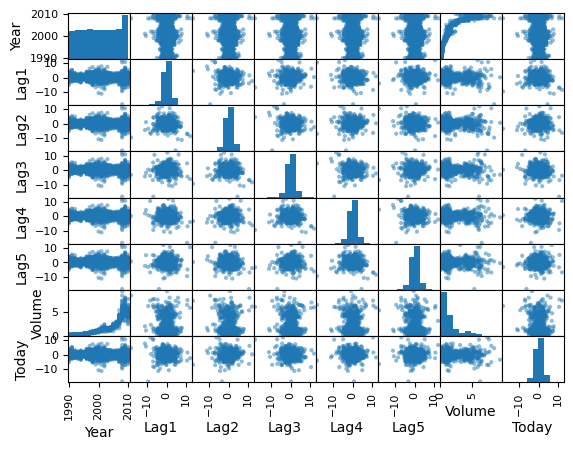

In [6]:
pd.plotting.scatter_matrix(weekly)

(a) Only column Year and Volume have a pattern, not others. 

(b) In GLM (general linear model) there is an option of logistic regression, with passing the argument `family=sm.families.Binomial()` to `sm.OLS()`.

In [7]:
weekly

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up


In [8]:
from ISLP.models import (ModelSpec as MS,
                         summarize)
import statsmodels.api as sm

## Logistic regression

In [9]:
allvars = weekly.columns.drop(['Today', 'Direction', 'Year'])
design = MS(allvars)
X = design.fit_transform(weekly)   # X with interception
y = weekly.Direction == 'Up'
glm = sm.GLM(y,
             X,
             family=sm.families.Binomial())
results = glm.fit()
summarize(results)

,coef,std err,z,P>|z|
intercept,0.2669,0.086,3.106,0.002
Lag1,-0.0413,0.026,-1.563,0.118
Lag2,0.0584,0.027,2.175,0.030
Lag3,-0.0161,0.027,-0.602,0.547
Lag4,-0.0278,0.026,-1.050,0.294
Lag5,-0.0145,0.026,-0.549,0.583
Volume,-0.0227,0.037,-0.616,0.538


In [10]:
X

,intercept,Lag1,Lag2,Lag3,Lag4,Lag5,Volume
0,1.0,0.816,1.572,-3.936,-0.229,-3.484,0.154976
1,1.0,-0.270,0.816,1.572,-3.936,-0.229,0.148574
2,1.0,-2.576,-0.270,0.816,1.572,-3.936,0.159837
3,1.0,3.514,-2.576,-0.270,0.816,1.572,0.161630
4,1.0,0.712,3.514,-2.576,-0.270,0.816,0.153728
...,...,...,...,...,...,...,...
1084,1.0,-0.861,0.043,-2.173,3.599,0.015,3.205160
1085,1.0,2.969,-0.861,0.043,-2.173,3.599,4.242568
1086,1.0,1.281,2.969,-0.861,0.043,-2.173,4.835082
1087,1.0,0.283,1.281,2.969,-0.861,0.043,4.454044


(b) Lag2 is important, as well as interception

In [11]:
import numpy as np

In [12]:
Direction_predict = np.array(['Down']*len(weekly))
Direction_predict[results.predict() > 0.5] = 'Up'
weekly['Direction_predi'] = Direction_predict
weekly

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,Direction_predi
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down,Up
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down,Up
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up,Down
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up,Up
...,...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up,Up
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up,Up
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up,Up
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up,Up


In [13]:
from ISLP import confusion_table

In [14]:
confusion_table(weekly.Direction_predi, weekly.Direction)

Truth,Down,Up
Predicted,,
Down,54,48
Up,430,557


Overall correct prediction rate is (54+557)/1089 = 56.11%.

In [28]:
singlevar = ['Lag2']
X_single = MS(singlevar).fit_transform(weekly)
X_s_train = X_single[weekly.Year < 2009]
X_s_test = X_single[weekly.Year > 2008]
y_train = y[weekly.Year < 2009]
y_test = y[weekly.Year > 2008]
y_train

0      False
1      False
2       True
3       True
4       True
       ...  
980    False
981     True
982     True
983    False
984     True
Name: Direction, Length: 985, dtype: bool

In [30]:
# logistic regression
glm_train = sm.GLM(y_train,
             X_s_train,
             family=sm.families.Binomial())
results_train = glm_train.fit()
summarize(results_train)

,coef,std err,z,P>|z|
intercept,0.2033,0.064,3.162,0.002
Lag2,0.0581,0.029,2.024,0.043


In [33]:
probs_predict_test = results_train.predict(exog = X_s_test)
y_predict_test = probs_predict_test > 0.5
y_predict_test

985     False
986     False
987     False
988     False
989      True
        ...  
1084     True
1085     True
1086     True
1087     True
1088     True
Name: Direction, Length: 104, dtype: bool

In [35]:
confusion_table(y_predict_test, y_test)

Truth,False,True
Predicted,,
False,9,5
True,34,56


Overall correct prediction rate is (9 + 56)/104 = 62.5%

## LDA Linear discrimination analysis

In [44]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(store_covariance=True)

Since LDA estimator automatically add intercept 1 to X, I don't need to do it by myself. So drop the intercept now.

In [45]:
X_s_train_LDA = X_s_train.drop(columns = ['intercept'])
X_s_test_LDA = X_s_test.drop(columns = ['intercept'])
X_s_train_LDA

,Lag2
0,1.572
1,0.816
2,-0.270
3,-2.576
4,3.514
...,...
980,-8.389
981,12.026
982,-2.251
983,0.418


In [46]:
lda.fit(X_s_train_LDA, y_train)

LinearDiscriminantAnalysis(store_covariance=True)

LDA assumes the data obeying Gaussian distribution within each group, and the standard deviations of each group are the same. Of course the means are different, calculated from the data. $[\mu_{lag2}(down), \mu_{lag2}(up)]=$

In [55]:
lda.means_

array([[-0.03568254],
       [ 0.26036581]])

In [50]:
lda.classes_

array([False,  True])

The priors $[p(k=down), p(k=up)]$ = 

In [56]:
lda.priors_

array([0.44771574, 0.55228426])

In [57]:
lda.scalings_

array([[0.44141622]])

In [61]:
lda.intercept_

array([0.203424])

In [79]:
import matplotlib.pyplot as plt

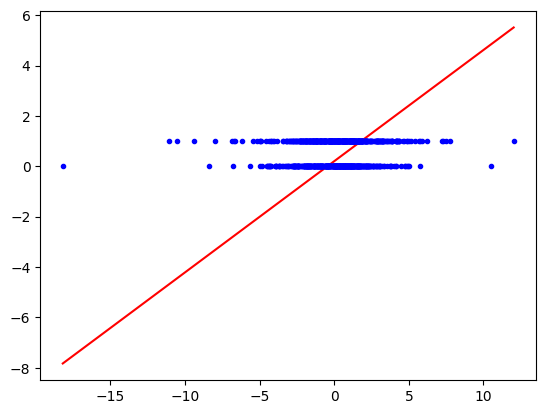

In [91]:
x = np.linspace(X_s_train_LDA.min(), X_s_train_LDA.max(), 100)
y = x * lda.scalings_[0][0] + lda.intercept_[0]
plt.plot(x, y, 'r', X_s_train_LDA, y_train.astype(int), 'b.')

In [95]:
lda_pred = lda.predict(X_s_test_LDA)

In [96]:
confusion_table(lda_pred, y_test)

Truth,False,True
Predicted,,
False,9,5
True,34,56


This confusion table (from LDA) is exactly the same as logistic regression.Overall correct prediction rate is (9 + 56)/104 = 62.5%

## QDA (quadratic discremination analysis)

QDA is similar to LDA, since they are both from sklearn

In [105]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
qda = QDA(store_covariance=True)

In [106]:
qda.fit(X_s_train_LDA, y_train)

QuadraticDiscriminantAnalysis(store_covariance=True)

In [107]:
qda_pred = qda.predict(X_s_test_LDA)

In [108]:
confusion_table(qda_pred, y_test)

Truth,False,True
Predicted,,
False,0,0
True,43,61


Overall correct prediction rate is (0 + 61)/104 = 58.7%

## Naive Bayes (NB)

In [109]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_s_train_LDA, y_train)

GaussianNB()

In [110]:
nb_pred = NB.predict(X_s_test_LDA)
confusion_table(nb_pred, y_test)

Truth,False,True
Predicted,,
False,0,0
True,43,61


Overall correct prediction rate is (0 + 61)/104 = 58.7%

## K nearest neighbors (KNN) with k = 1

In [118]:
from sklearn.neighbors import KNeighborsClassifier

In [119]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_s_train_LDA, y_train)
knn1_pred = knn1.predict(X_s_test_LDA)
confusion_table(knn1_pred, y_test)

Truth,False,True
Predicted,,
False,22,31
True,21,30


Overall correct prediction rate is (22 + 30)/104 = 50%.

LDA and logistic regression provide the best results on this data.